In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('global_ads_performance_dataset.csv')

# Inspect the data
print("--- Info ---")
df.info()
print("\n--- Head ---")
print(df.head())
print("\n--- Summary Statistics ---")
df.describe()

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1800 non-null   object 
 1   platform       1800 non-null   object 
 2   campaign_type  1800 non-null   object 
 3   industry       1800 non-null   object 
 4   country        1800 non-null   object 
 5   impressions    1800 non-null   int64  
 6   clicks         1800 non-null   int64  
 7   CTR            1800 non-null   float64
 8   CPC            1800 non-null   float64
 9   ad_spend       1800 non-null   float64
 10  conversions    1800 non-null   int64  
 11  CPA            1800 non-null   float64
 12  revenue        1800 non-null   float64
 13  ROAS           1800 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 197.0+ KB

--- Head ---
         date    platform campaign_type    industry  country  impressions  \
0  2024-01-21  Google

,impressions,clicks,CTR,CPC,ad_spend,conversions,CPA,revenue,ROAS
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,102919.018889,3962.675556,0.038427,1.572756,6171.527272,181.562222,46.608961,30101.850450,6.450367
std,55740.900690,2941.858037,0.017082,0.800872,5776.996958,171.424239,41.185556,34560.032941,6.590986
min,5059.000000,91.000000,0.008900,0.280000,58.000000,2.000000,4.800000,142.690000,0.130000
25%,54948.000000,1678.000000,0.025400,0.950000,1966.587500,59.000000,20.202500,7275.757500,2.170000
50%,103653.000000,3318.000000,0.035550,1.460000,4393.860000,130.000000,33.375000,18362.965000,4.295000
75%,150470.250000,5628.000000,0.049800,2.050000,8455.830000,252.250000,56.812500,38963.385000,8.212500
max,199650.000000,16660.000000,0.095600,3.950000,38453.320000,1151.000000,335.860000,295028.260000,49.000000


Accuracy: 0.6638888888888889

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       182
           1       0.66      0.67      0.66       178

    accuracy                           0.66       360
   macro avg       0.66      0.66      0.66       360
weighted avg       0.66      0.66      0.66       360



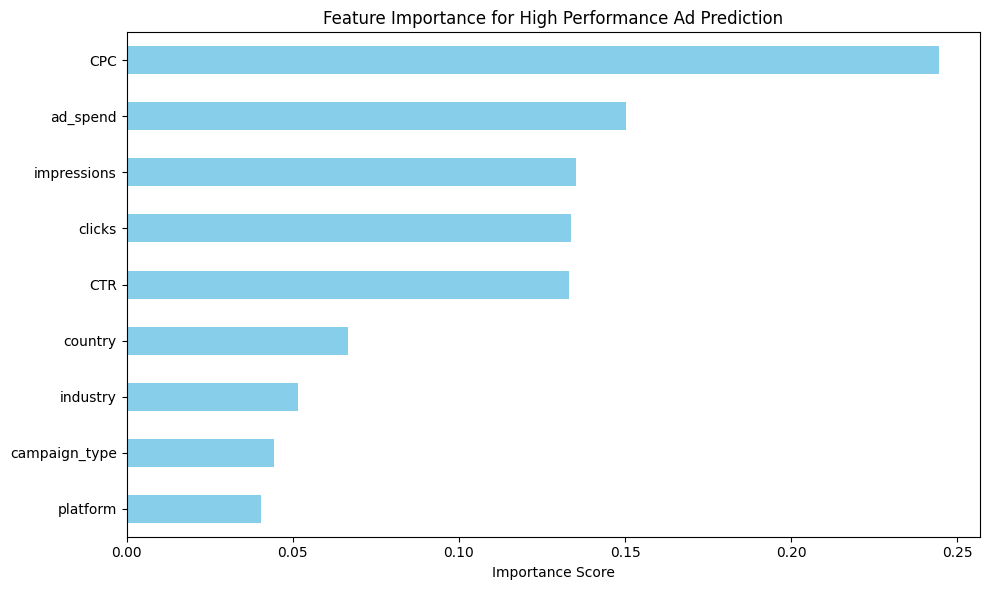

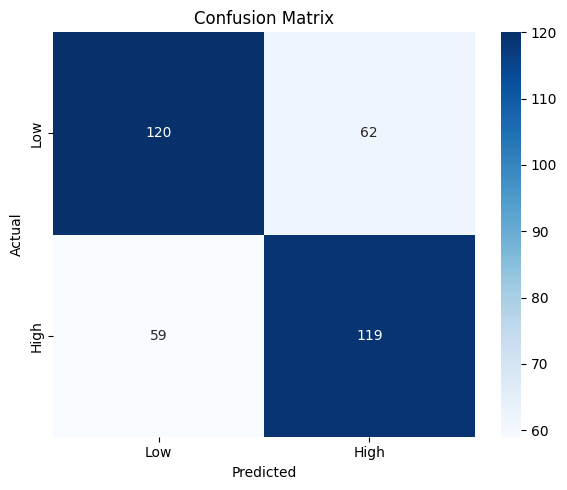

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. PREPROCESSING

median_roas = df['ROAS'].median()
df['is_high_performance'] = (df['ROAS'] > median_roas).astype(int)

#  drop 'revenue', 'CPA', 'conversions' because they are outcomes.
cols_to_drop = ['date', 'ROAS', 'revenue', 'CPA', 'conversions', 'is_high_performance']
X = df.drop(columns=cols_to_drop)
y = df['is_high_performance']

# Encoding categorical variables
cat_cols = ['platform', 'campaign_type', 'industry', 'country']
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. MODELING
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 3. EVALUATION
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh', color='skyblue')
plt.title('Feature Importance for High Performance Ad Prediction')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('feature_importance.png')

# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')

# Summary for the user
summary_data = {
    'Metric': ['Accuracy', 'Median ROAS Threshold'],
    'Value': [accuracy, median_roas]
}
pd.DataFrame(summary_data).to_csv('model_summary.csv', index=False)



Average ROAS by Platform:
platform
TikTok Ads    9.538600
Meta Ads      6.915730
Google Ads    4.113028
Name: ROAS, dtype: float64

Average ROAS by Industry:
industry
EdTech        6.828952
SaaS          6.647973
Healthcare    6.587989
E-commerce    6.133524
Fintech       6.031357
Name: ROAS, dtype: float64


/tmp/ipython-input-3063467198.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='industry', y='ROAS', data=df, palette='Set3')
/tmp/ipython-input-3063467198.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='platform', y='ROAS', data=df, palette='viridis', ci=None)
/tmp/ipython-input-3063467198.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='ROAS', data=df, palette='viridis', ci=None)


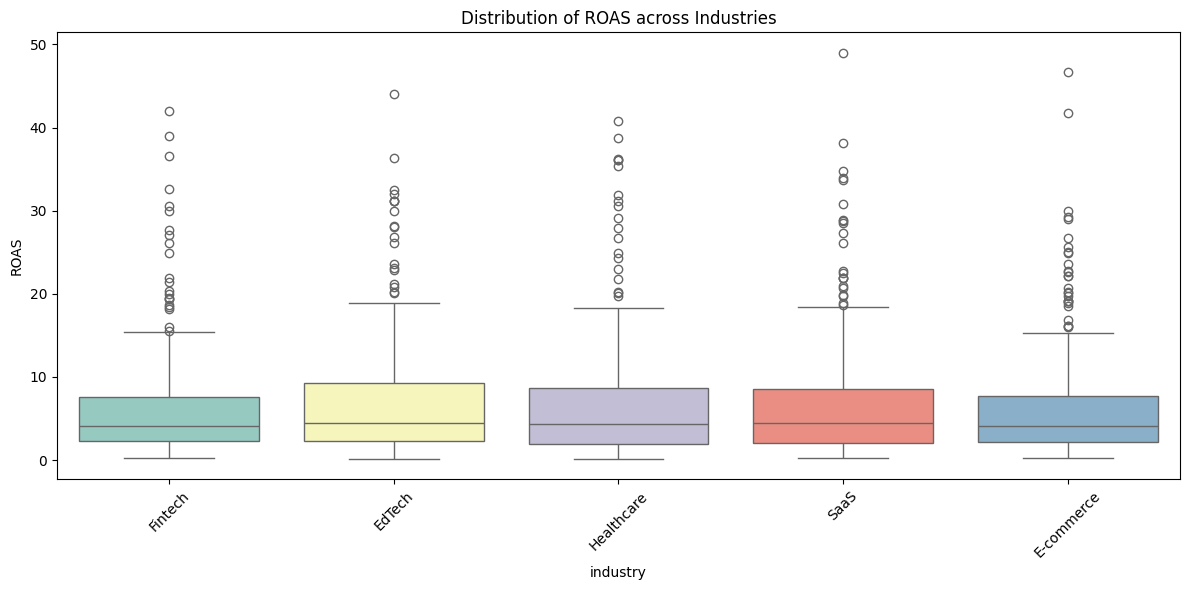

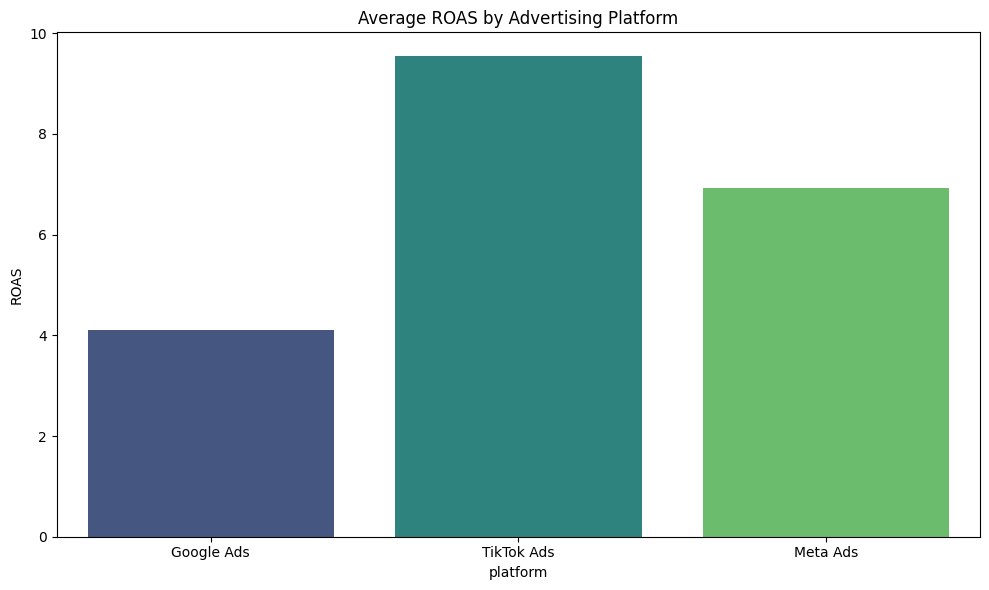

In [6]:
# Analysis by Platform and Industry
analysis_platform = df.groupby('platform')['ROAS'].mean().sort_values(ascending=False)
analysis_industry = df.groupby('industry')['ROAS'].mean().sort_values(ascending=False)

print("Average ROAS by Platform:")
print(analysis_platform)
print("\nAverage ROAS by Industry:")
print(analysis_industry)

# Save these for the report
analysis_platform.to_csv('analysis_platform.csv')
analysis_industry.to_csv('analysis_industry.csv')

# Visualizing ROAS by Industry
plt.figure(figsize=(12, 6))
sns.boxplot(x='industry', y='ROAS', data=df, palette='Set3')
plt.title('Distribution of ROAS across Industries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('roas_by_industry.png')

# Visualizing ROAS by Platform
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='ROAS', data=df, palette='viridis', ci=None)
plt.title('Average ROAS by Advertising Platform')
plt.tight_layout()
plt.savefig('roas_by_platform.png')